## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [5]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_l2ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
## 超參數設定

In [10]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
l1_l2EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in l1_l2EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:],l1_l2ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 29s 573us/step - loss: 18.8042 - acc: 0.2789 - val_loss: 17.3578 - val_acc: 0.3470
Epoch 2/50
50000/50000 [==============================] - 27s 540us/step - loss: 16.1437 - acc: 0.3639 - val_loss: 14.9817 - val_acc: 0.3732
Epoch 3/50
50000/50000 [==============================] - 26s 528us/step - loss: 13.9609 - acc: 0.3837 - val_loss: 12.9743 - val_acc: 0.3883
Epoch 4/50
50000/50000 [==============================] - 27s 540us/step - loss: 12.1113 - acc: 0.3954 - val_loss: 11.2771 - val_acc: 0.3995
Epoch 5/50
50000/50000 [==============================] - 25s 506us/step - loss: 10.5400 - acc: 0.4058 - val_loss: 9.8268 - val_acc: 0.4073
Epoch 6/50
50000/50000 [==============================] - 23s 459us/step - loss: 9.2022 - acc: 0.4127 - val_loss: 8.6031 - val_acc: 0.4113
Epoch 7/50
50000/50000 [==============================] - 22s 446us/step - loss: 8.0636 - acc: 0.4171 - val

50000/50000 [==============================] - 25s 491us/step - loss: 15.0746 - acc: 0.2836 - val_loss: 13.9486 - val_acc: 0.3494
Epoch 2/50
50000/50000 [==============================] - 24s 486us/step - loss: 13.0122 - acc: 0.3606 - val_loss: 12.1283 - val_acc: 0.3744
Epoch 3/50
50000/50000 [==============================] - 24s 486us/step - loss: 11.3408 - acc: 0.3851 - val_loss: 10.5893 - val_acc: 0.3906
Epoch 4/50
50000/50000 [==============================] - 24s 478us/step - loss: 9.9273 - acc: 0.3995 - val_loss: 9.2948 - val_acc: 0.3994
Epoch 5/50
50000/50000 [==============================] - 24s 476us/step - loss: 8.7259 - acc: 0.4098 - val_loss: 8.1799 - val_acc: 0.4162
Epoch 6/50
50000/50000 [==============================] - 24s 474us/step - loss: 7.7022 - acc: 0.4180 - val_loss: 7.2402 - val_acc: 0.4186
Epoch 7/50
50000/50000 [==============================] - 26s 515us/step - loss: 6.8296 - acc: 0.4259 - val_loss: 6.4392 - val_acc: 0.4279
Epoch 8/50
50000/50000 [========

Epoch 2/50
50000/50000 [==============================] - 25s 505us/step - loss: 13.0077 - acc: 0.3616 - val_loss: 12.1261 - val_acc: 0.3597
Epoch 3/50
50000/50000 [==============================] - 23s 469us/step - loss: 11.3372 - acc: 0.3860 - val_loss: 10.5916 - val_acc: 0.3879
Epoch 4/50
50000/50000 [==============================] - 24s 475us/step - loss: 9.9282 - acc: 0.3987 - val_loss: 9.2924 - val_acc: 0.4003
Epoch 5/50
50000/50000 [==============================] - 23s 451us/step - loss: 8.7303 - acc: 0.4085 - val_loss: 8.1993 - val_acc: 0.4050
Epoch 6/50
50000/50000 [==============================] - 23s 457us/step - loss: 7.7076 - acc: 0.4156 - val_loss: 7.2462 - val_acc: 0.4158
Epoch 7/50
50000/50000 [==============================] - 22s 449us/step - loss: 6.8387 - acc: 0.4216 - val_loss: 6.4404 - val_acc: 0.4220
Epoch 8/50
50000/50000 [==============================] - 23s 457us/step - loss: 6.0950 - acc: 0.4270 - val_loss: 5.7625 - val_acc: 0.4243
Epoch 9/50
50000/50000 

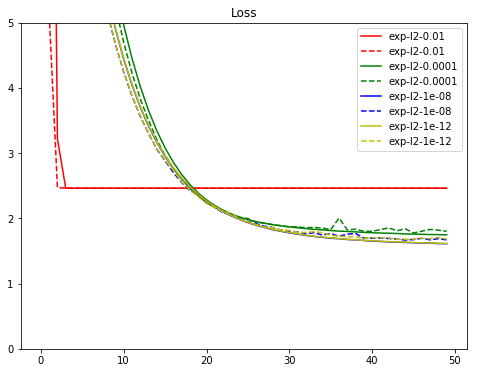

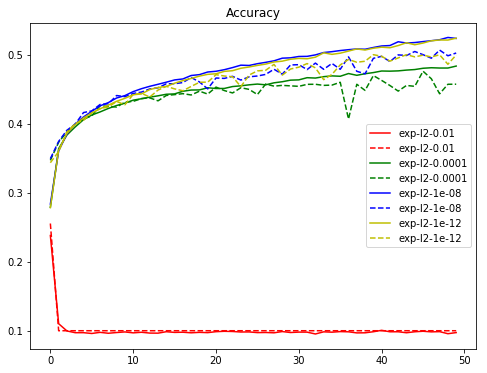

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [40]:
from keras.regularizers import l1, l2, l1_l2

In [41]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
## 超參數設定

In [42]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [43]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 22s 438us/step - loss: 5.9937 - acc: 0.2801 - val_loss: 5.7930 - val_acc: 0.3516
Epoch 2/50
50000/50000 [==============================] - 21s 424us/step - loss: 5.7066 - acc: 0.3704 - val_loss: 5.6322 - val_acc: 0.3861
Epoch 3/50
50000/50000 [==============================] - 22s 437us/step - loss: 5.5600 - acc: 0.4002 - val_loss: 5.5008 - val_acc: 0.4091
Epoch 4/50
50000/50000 [==============================] - 21s 428us/step - loss: 5.4385 - acc: 0.4199 - val_loss: 5.3933 - val_acc: 0.4199
Epoch 5/50
50000/50000 [==============================] - 21s 422us/step - loss: 5.3298 - acc: 0.4362 - val_loss: 5.2990 - val_acc: 0.4354
Epoch 6/50
50000/50000 [==============================] - 21s 423us/step - loss: 5.2307 - acc: 0.4474 - val_loss: 5.2057 - val_acc: 0.4454
Epoch 7/50
50000/50000 [==============================] - 21s 428us/step - loss: 5.1364 - acc: 0.4594 - val_loss: 5.

50000/50000 [==============================] - 22s 436us/step - loss: 2.0242 - acc: 0.2749 - val_loss: 1.8627 - val_acc: 0.3350
Epoch 2/50
50000/50000 [==============================] - 21s 429us/step - loss: 1.7988 - acc: 0.3666 - val_loss: 1.7502 - val_acc: 0.3854
Epoch 3/50
50000/50000 [==============================] - 22s 437us/step - loss: 1.7194 - acc: 0.3985 - val_loss: 1.6987 - val_acc: 0.3992
Epoch 4/50
50000/50000 [==============================] - 22s 434us/step - loss: 1.6635 - acc: 0.4146 - val_loss: 1.6450 - val_acc: 0.4228
Epoch 5/50
50000/50000 [==============================] - 22s 431us/step - loss: 1.6190 - acc: 0.4325 - val_loss: 1.6035 - val_acc: 0.4402
Epoch 6/50
50000/50000 [==============================] - 22s 437us/step - loss: 1.5804 - acc: 0.4469 - val_loss: 1.5768 - val_acc: 0.4430
Epoch 7/50
50000/50000 [==============================] - 22s 436us/step - loss: 1.5470 - acc: 0.4594 - val_loss: 1.5439 - val_acc: 0.4589
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 22s 444us/step - loss: 1.8079 - acc: 0.3694 - val_loss: 1.7530 - val_acc: 0.3879
Epoch 3/50
50000/50000 [==============================] - 21s 429us/step - loss: 1.7245 - acc: 0.3976 - val_loss: 1.7003 - val_acc: 0.4033
Epoch 4/50
50000/50000 [==============================] - 21s 430us/step - loss: 1.6647 - acc: 0.4194 - val_loss: 1.6473 - val_acc: 0.4209
Epoch 5/50
50000/50000 [==============================] - 22s 431us/step - loss: 1.6159 - acc: 0.4355 - val_loss: 1.6070 - val_acc: 0.4326
Epoch 6/50
50000/50000 [==============================] - 22s 431us/step - loss: 1.5771 - acc: 0.4478 - val_loss: 1.5720 - val_acc: 0.4462
Epoch 7/50
50000/50000 [==============================] - 21s 429us/step - loss: 1.5424 - acc: 0.4595 - val_loss: 1.5469 - val_acc: 0.4558
Epoch 8/50
50000/50000 [==============================] - 22s 440us/step - loss: 1.5138 - acc: 0.4700 - val_loss: 1.5217 - val_acc: 0.4655
Epoch 9/50
50000/50000 [===

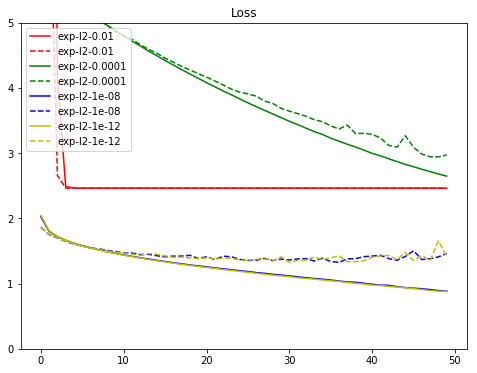

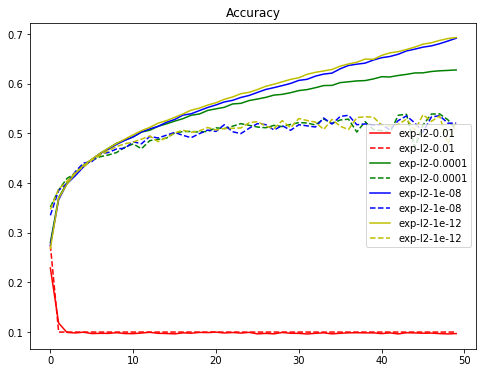

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()